<a href="https://colab.research.google.com/github/rmartey/Apple-stock-prediction/blob/main/Apple_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing the libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#get the stock quote
df =pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1167955200&period2=1651708800&interval=1d&events=history&includeAdjustedClose=true",index_col="Date",parse_dates =True,infer_datetime_format=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-05,3.063214,3.078571,3.014286,3.037500,2.597116,834741600
2007-01-08,3.070000,3.090357,3.045714,3.052500,2.609942,797106800
2007-01-09,3.087500,3.320714,3.041071,3.306071,2.826750,3349298400
2007-01-10,3.383929,3.492857,3.337500,3.464286,2.962027,2952880000
2007-01-11,3.426429,3.456429,3.396429,3.421429,2.925383,1440252800
...,...,...,...,...,...,...
2022-04-28,159.250000,164.520004,158.929993,163.639999,163.399918,130216800
2022-04-29,161.839996,166.199997,157.250000,157.649994,157.418701,131587100
2022-05-02,156.710007,158.229996,153.270004,157.960007,157.728256,123055300


In [4]:
#get the number of rows and columns in the data set
df.shape

(3860, 6)

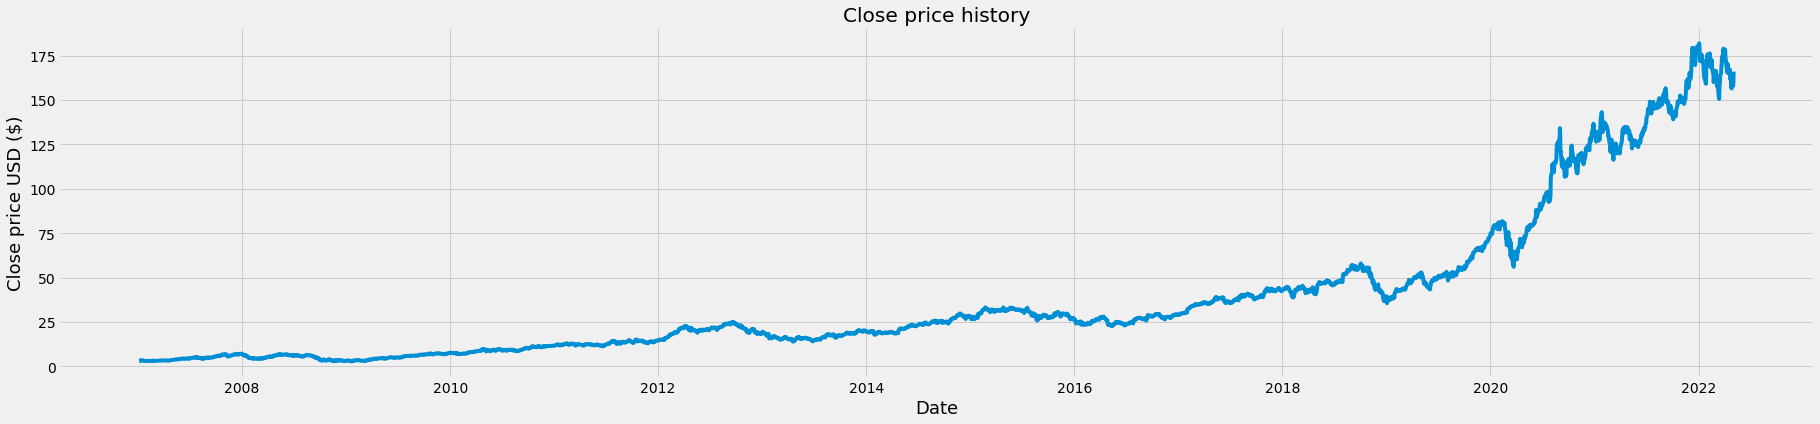

In [5]:
#visualize the closing price history
plt.figure(figsize=(28,6))
plt.title("Close price history")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close price USD ($)", fontsize=18)
plt.show()

In [6]:
#create a new dataframe with only the close column
data = df.filter(["Close"])
#convert dataframe to a numpy array
dataset = data.values
#get the numbe of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)

training_data_len


3088

In [7]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00136506],
       [0.00144876],
       [0.00286364],
       ...,
       [0.86580531],
       [0.87428658],
       [0.91077867]])

In [8]:
#create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len,:]

#split the data into x_train and y_train data sets
x_train =[]
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()


[array([0.00136506, 0.00144876, 0.00286364, 0.00374646, 0.00350732,
       0.00327217, 0.00376638, 0.00333793, 0.00216617, 0.00205258,
       0.00171181, 0.00149459, 0.00169388, 0.0016042 , 0.00143083,
       0.00154243, 0.0014647 , 0.00150058, 0.00130329, 0.00130528,
       0.00114386, 0.00118571, 0.00158427, 0.00159025, 0.00101035,
       0.00133119, 0.00129532, 0.00141489, 0.00139695, 0.00132122,
       0.00153445, 0.00219207, 0.00225385, 0.00216617, 0.00205457,
       0.00114187, 0.00127738, 0.00176562, 0.0014368 , 0.00161815,
       0.0019908 , 0.00189714, 0.00195294, 0.00194696, 0.00232559,
       0.00203265, 0.0023515 , 0.00226581, 0.00226979, 0.00257668,
       0.00264643, 0.00312271, 0.00314064, 0.00305296, 0.00351728,
       0.00343957, 0.00299716, 0.00309879, 0.0029314 , 0.00307887])]
[0.0032482551975581715]

[array([0.00136506, 0.00144876, 0.00286364, 0.00374646, 0.00350732,
       0.00327217, 0.00376638, 0.00333793, 0.00216617, 0.00205258,
       0.00171181, 0.00149459, 0.

In [9]:
#convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train),np.array(y_train)

In [10]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(3028, 60, 1)

In [11]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [13]:
# train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

3028/3028 [==============================] - 86s 27ms/step - loss: 1.1369e-04


In [17]:
#create the testing data set
#create a new array containing scaled values from index 3028 to 3860
test_data = scaled_data[training_data_len-60: , : ]
#create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [18]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [19]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [20]:
#get the model's predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [21]:
#get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

6.614758862167752

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


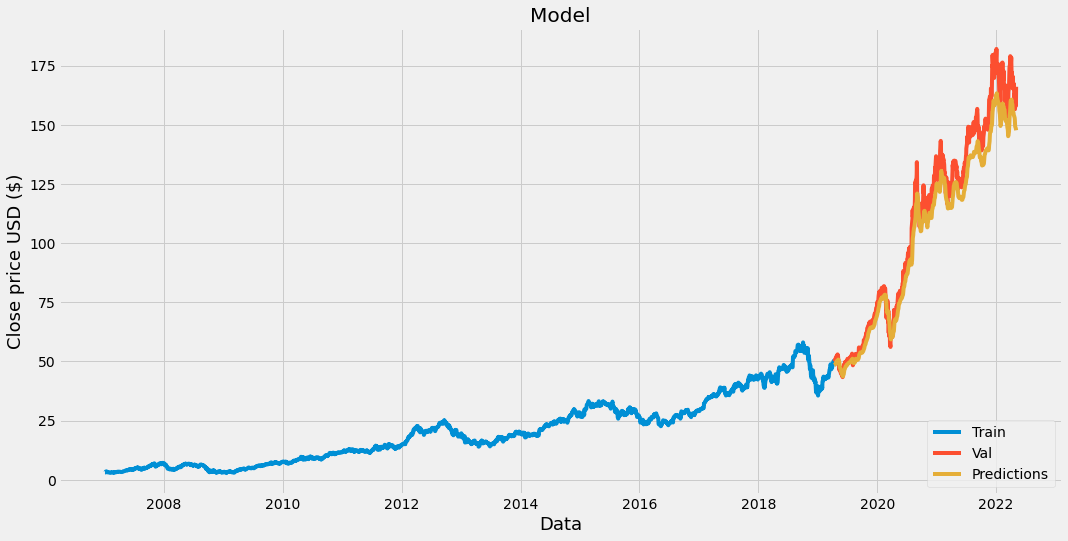

In [22]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"]= predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize= 18)
plt.ylabel('Close price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc="lower right")
plt.show()

In [23]:
#show the actual and predicted prices
valid

,Close,Predictions
Date,,
2019-04-12,49.717499,48.413029
2019-04-15,49.807499,48.510025
2019-04-16,49.812500,48.575684
2019-04-17,50.782501,48.620026
2019-04-18,50.965000,48.787041
...,...,...
2022-04-28,163.639999,149.274353
2022-04-29,157.649994,149.068985
2022-05-02,157.960007,148.449722
